In [1]:
from datetime import datetime

from pathlib import Path

import numpy as np
from scipy.stats import lognorm
import pandas as pd

from astropy.visualization import hist

from matplotlib import style
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from minicyclop.io import read_seeing_data

style.use('ggplot')

%load_ext autoreload
%autoreload 2
#%matplotlib widget

In [2]:
rootdir = Path("./data")
# use find to make this csv list
with open(rootdir / "2022_2023.txt") as f:
    csvs = f.readlines()

# loop through the csv files and read them with pandas
frames = []
for csv in csvs:
    frames.append(pd.read_csv(rootdir / csv.rstrip()))

# now concat each frame into one big frame containing all of the data
data = pd.concat(frames)

# read in the data from the seeing monitor
cyclop = read_seeing_data(Path.home() / "MMT/minicyclop/data/MiniCyclop/Data/Seeing_Data.txt")
cyclop = cyclop[(cyclop.index >= '2022-01-01') & (cyclop.index < '2024-01-01')]

In [3]:
g = data.groupby('wfs')
g.wfs.describe()

,count,unique,top,freq
wfs,,,,
binospec,76471,1,binospec,76471
f5,3883,1,f5,3883
mmirs,10500,1,mmirs,10500
newf9,1123,1,newf9,1123


In [4]:
# re-calculate the seeing using updated spot FWHM for binospec. filter out any NaN values...
#fixed_list = []
#for wfskey, group in g:
#    wfs = wfs_systems[wfskey]
#    group = g.get_group(wfskey)
#    #group.apply(seeing, axis=1, args=(wfs,))
#    group['fixed_raw_seeing'], group['fixed_seeing'] = seeing(group, wfs)
#    fixed_list.append(group)
#fixed = pd.concat(fixed_list)
#fixed.rename(index=str, columns={"seeing": "orig_seeing", "raw seeing": "orig_raw_seeing"}, inplace=True)
#fixed.rename(index=str, columns={"fixed_seeing": "seeing", "fixed_raw_seeing": "raw seeing"}, inplace=True)
fixed = data[np.isfinite(data['seeing'])]
fixed = fixed[fixed['fwhm'] > 0.]
fixed = fixed[fixed['seeing'] > 0.]
fixed = fixed[fixed['seeing'] < 4.]
fixed = fixed[fixed['time'] >= "2022-06-08"]

In [5]:
fixed.sort_values(by='time')

,time,wfs,file,exptime,airmass,az,el,osst,outt,chamt,...,focerr,cc_x_err,cc_y_err,xcen,ycen,seeing,raw_seeing,fwhm,wavefront_rms,residual_rms
0,2022-06-08T03:30:14,newf9,f9wfs_20220607-203018.fits,5.0,1.0593,97.642308,70.730236,19.0,19.3,18.933,...,194.27,7.052,10.895,449.000215,411.999791,0.890345,0.921658,8.346540,3988.708005,1508.457967
1,2022-06-08T03:30:39,newf9,f9wfs_20220607-203042.fits,10.0,1.0588,97.730414,70.819017,19.0,19.3,18.984,...,184.08,7.535,7.180,449.999781,411.000036,0.886253,0.917162,8.316266,3800.863429,1461.807997
2,2022-06-08T03:31:29,newf9,f9wfs_20220607-203133.fits,15.0,1.0577,97.904800,70.993050,19.0,19.3,19.032,...,-74.71,-0.000,6.027,444.999749,406.666496,1.100728,1.138407,9.792235,1595.348071,1436.640677
3,2022-06-08T03:32:24,newf9,f9wfs_20220607-203226.fits,19.0,1.0564,98.103273,71.188336,19.0,19.3,19.061,...,24.84,-1.592,2.793,441.001118,411.333576,1.076710,1.112746,9.622516,633.569373,1418.819899
4,2022-06-08T03:33:09,newf9,f9wfs_20220607-203312.fits,19.0,1.0555,98.264141,71.344537,19.0,19.3,19.082,...,20.71,2.548,0.000,447.333581,404.666807,1.035039,1.069133,9.333179,687.110947,1332.715182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,2023-12-31T11:50:50.485000,f5,f5wfs_20231231-045102.fits,10.0,1.0752,69.884890,68.447591,0.0,-1.1,-0.300,...,-32.06,-18.316,9.335,265.995566,245.008369,1.159294,1.210841,7.240234,1211.577550,1562.743097
26,2023-12-31T11:51:27.281000,f5,f5wfs_20231231-045139.fits,10.0,1.0743,69.848991,68.571831,0.0,-1.1,-0.400,...,17.63,-2.563,2.621,264.007656,246.994928,1.286689,1.343226,7.843422,617.221166,1621.958132
27,2023-12-31T12:55:36.309000,f5,f5wfs_20231231-055548.fits,10.0,1.0288,50.370951,76.403698,0.0,-1.4,-0.300,...,-40.06,-13.202,-3.236,269.996257,236.996231,1.432721,1.457338,8.358161,1395.799580,1740.634027
28,2023-12-31T12:56:11.181000,f5,f5wfs_20231231-055623.fits,10.0,1.0284,50.121527,76.496599,0.0,-1.3,-0.300,...,29.00,-0.000,-0.187,274.003177,250.005098,1.107692,1.126461,6.852342,892.881083,1897.996554


In [6]:
# create a date-time index so we can group and analyze the data by timestamps
fixed = fixed.set_index(pd.DatetimeIndex(fixed['time'], name='ut'))

<Figure size 800x500 with 0 Axes>

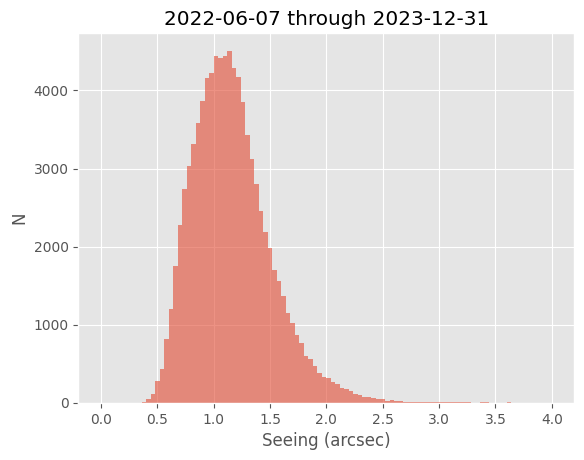

In [7]:
# make raw histogram of the zenith-corrected seeing column
fig = plt.figure(figsize=(8, 5))
fixed.hist(column='seeing', bins=100, range=(0.0, 4.0), alpha=0.6)
with plt.style.context('ggplot'):
    plt.title("2022-06-07 through 2023-12-31")
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("N")
plt.show()

In [8]:
# fit a log-normal distribution to the seeing data
sigma, loc, exp_mu = lognorm.fit(fixed['seeing'])
print(sigma, loc, exp_mu)
x = np.arange(0.0, 4.0, 0.01)
p = lognorm.pdf(x, sigma, loc=loc, scale=exp_mu)
mu = np.log(exp_mu)
mode = np.exp(mu - sigma**2) + loc
median = np.nanmedian(fixed['seeing'])
fit_median = exp_mu + loc

0.2809787371599398 -0.05414833710440666 1.1683552967203945


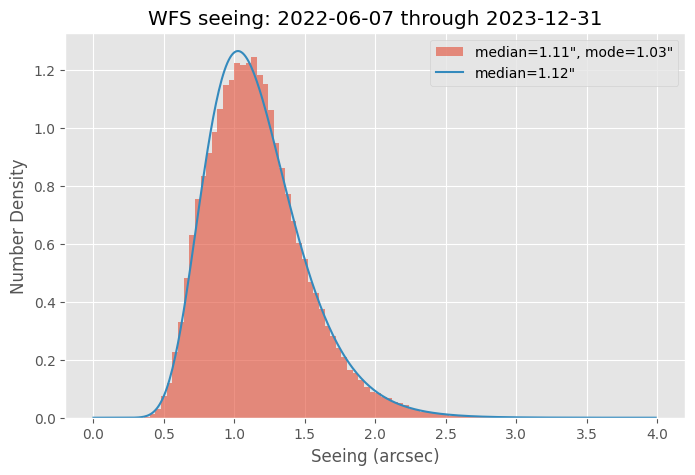

In [9]:
# plot normalized histogram with the fit and the median/mode calculated from the fit.
fig = plt.figure(figsize=(8, 5))
with plt.style.context('ggplot'):
    plt.hist(fixed['seeing'], density=True, bins=100, range=(0.0, 4.0), label="hist", alpha=0.6)
    logp = plt.plot(x, p, label="logp")
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("Number Density")
    plt.title("WFS seeing: 2022-06-07 through 2023-12-31")
    plt.legend(["median=%.2f\", mode=%.2f\"" % (fit_median, mode), "median=%.2f\"" % (
        median
    )])
    plt.savefig("wfs_cyclop_wfs_hist.pdf")
plt.show()

In [10]:
# now use the between_time() method to split the data into first and second halves of the night.
first_half = fixed.between_time(start_time='00:00', end_time='07:00')
second_half = fixed.between_time(start_time='07:00', end_time='14:00')
med_1st = np.median(first_half['seeing'])
med_2nd = np.median(second_half['seeing'])

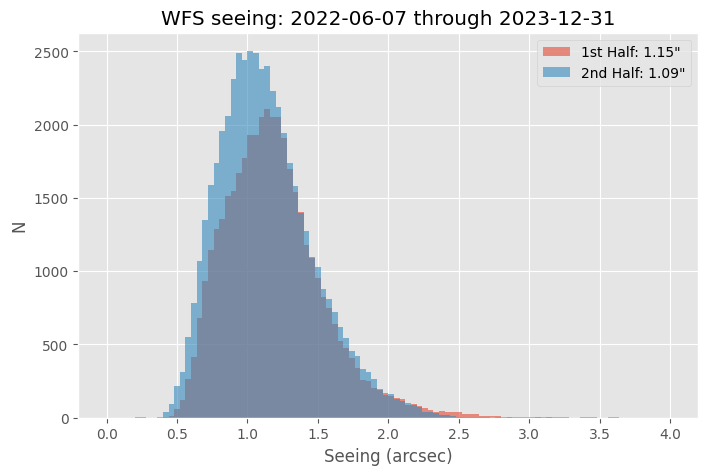

In [11]:
# plot the results and show that the seeing is better later in the night...
fig = plt.figure(figsize=(8, 5))
plt.hist(first_half['seeing'], bins=100, range=(0.0, 4.0), label="1st", alpha=0.6)
plt.hist(second_half['seeing'], bins=100, range=(0.0, 4.0), label="2nd", alpha=0.6)
plt.legend(["1st Half: %.2f\"" % med_1st, "2nd Half: %.2f\"" % med_2nd])
plt.xlabel("Seeing (arcsec)")
plt.ylabel("N")
plt.title("WFS seeing: 2022-06-07 through 2023-12-31")
plt.savefig("wfs_cyclop_1st2nd.pdf")
plt.show()

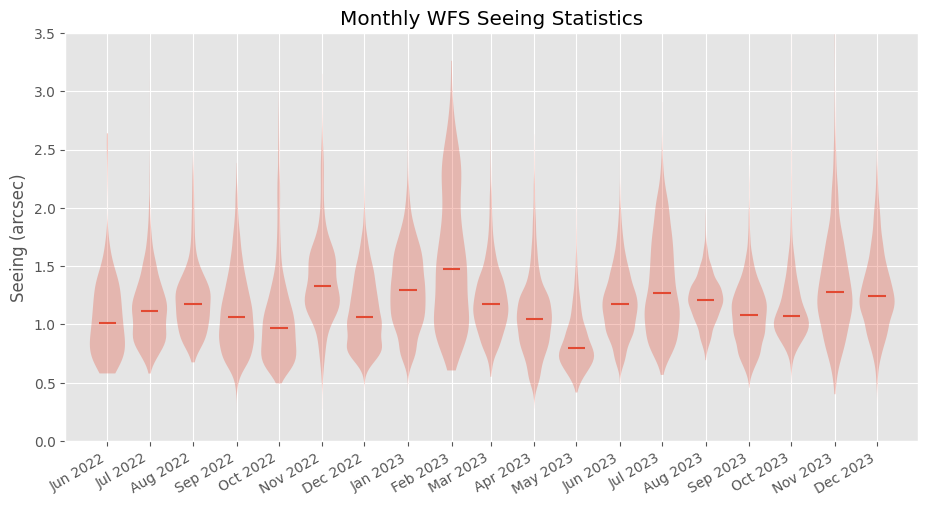

In [12]:
months = sorted(list(set(fixed.index.strftime('%Y-%m'))))
mdata = [np.array(fixed.loc[month]['seeing']) for month in months]
clean_data = {}
for d, arr in zip(months, mdata):
    if len(arr) > 0:
        clean_data[d] = arr
date_labels = [datetime.strptime(d, "%Y-%m").date() for d in clean_data.keys()]

with plt.style.context('ggplot', after_reset=True):
    fig, ax = plt.subplots(figsize=(11,6))
    plt.violinplot(clean_data.values(), mdates.date2num(date_labels), points=100, widths=25,
                showextrema=False, showmedians=True, bw_method='silverman')

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
    ax.set_ylim(0.0, 3.5)
    ax.set_xlim(
        datetime.strptime('2022-05-2', "%Y-%m-%d").date(),
        datetime.strptime('2023-12-30', "%Y-%m-%d").date()
    )
    fig.autofmt_xdate()
    plt.ylabel("Seeing (arcsec)")
    plt.savefig("wfs_cyclop_violin_monthly.pdf")
    plt.title("Monthly WFS Seeing Statistics")
    plt.show()

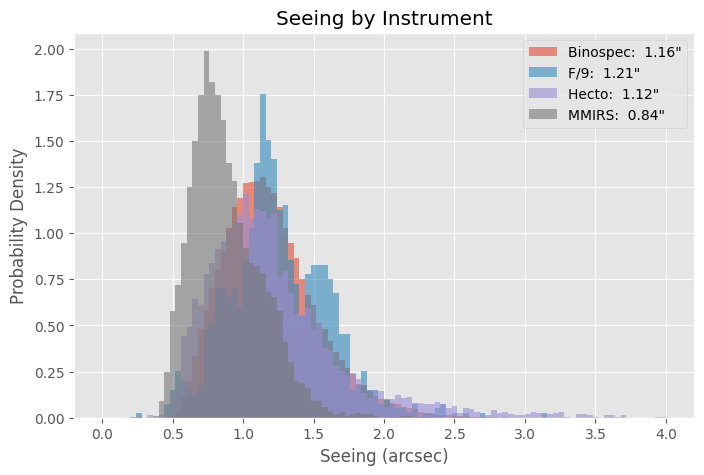

In [13]:
with plt.style.context('ggplot'):
    fig = plt.figure(figsize=(8, 5))
    medb = np.median(fixed['seeing'][fixed['wfs'] == 'binospec'])
    med9 = np.median(fixed['seeing'][fixed['wfs'] == 'newf9'])
    medf = np.median(fixed['seeing'][fixed['wfs'] == 'f5'])
    medm = np.median(fixed['seeing'][fixed['wfs'] == 'mmirs'])
    plt.hist(fixed['seeing'][fixed['wfs'] == 'binospec'], density=True, bins=100, range=(0.0, 4.), alpha=0.6, label=f"Binospec: {medb: .2f}\"")
    plt.hist(fixed['seeing'][fixed['wfs'] == 'newf9'], density=True, bins=100, range=(0.0, 4.), alpha=0.6, label=f"F/9: {med9: .2f}\"")
    plt.hist(fixed['seeing'][fixed['wfs'] == 'f5'], density=True, bins=100, range=(0.0, 4.), alpha=0.6, label=f"Hecto: {medf: .2f}\"")
    plt.hist(fixed['seeing'][fixed['wfs'] == 'mmirs'], density=True, bins=100, range=(0.0, 4.), alpha=0.6, label=f"MMIRS: {medm: .2f}\"")
    plt.legend()
    plt.title("Seeing by Instrument")
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("Probability Density")
plt.savefig("wfs_cyclop_per_instrument.pdf")
plt.show()

0.5338957623773113 0.40942206915576956 0.6690117998329428


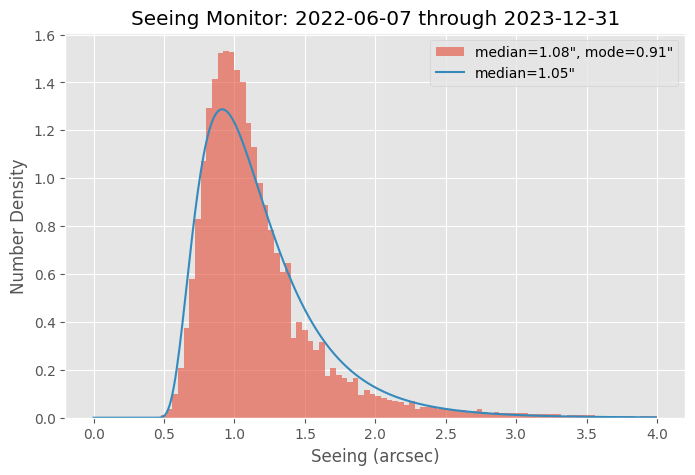

In [14]:
# fit a log-normal distribution to the seeing data
cyc_sigma, cyc_loc, cyc_exp_mu = lognorm.fit(cyclop['seeing'])
print(cyc_sigma, cyc_loc, cyc_exp_mu)
cyc_x = np.arange(0.0, 4.0, 0.01)
cyc_p = lognorm.pdf(x, cyc_sigma, loc=cyc_loc, scale=cyc_exp_mu)
cyc_mu = np.log(cyc_exp_mu)
cyc_mode = np.exp(cyc_mu - cyc_sigma**2) + cyc_loc
cyc_median = np.nanmedian(cyclop['seeing'])
cyc_fit_median = cyc_exp_mu + cyc_loc

# plot normalized histogram with the fit and the median/mode calculated from the fit.
fig = plt.figure(figsize=(8, 5))
with plt.style.context('ggplot'):
    plt.hist(cyclop['seeing'], density=True, bins=100, range=(0.0, 4.0), label="hist", alpha=0.6)
    logp = plt.plot(cyc_x, cyc_p, label="logp")
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("Number Density")
    plt.title("Seeing Monitor: 2022-06-07 through 2023-12-31")
    plt.legend(["median=%.2f\", mode=%.2f\"" % (cyc_fit_median, cyc_mode), "median=%.2f\"" % (
        cyc_median
    )])
    plt.savefig("wfs_cyclop_hist.pdf")
plt.show()

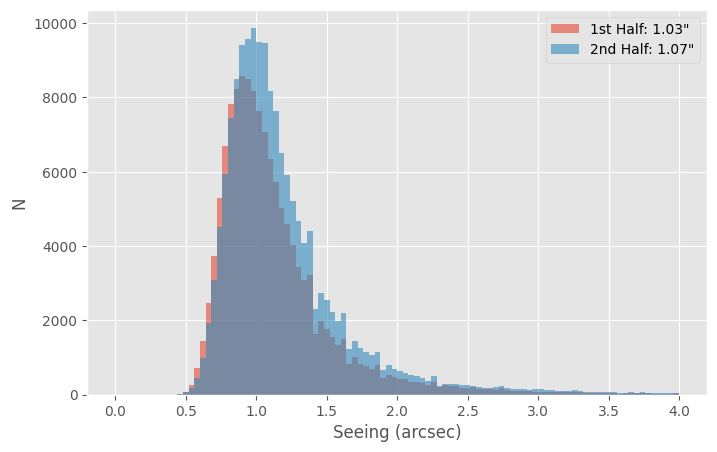

In [15]:
# now use the between_time() method to split the data into first and second halves of the night.
first_half = cyclop.between_time(start_time='00:00', end_time='07:00')
second_half = cyclop.between_time(start_time='07:00', end_time='14:00')
med_1st = np.median(first_half['seeing'])
med_2nd = np.median(second_half['seeing'])

# plot the results and show that the seeing is better later in the night...
fig = plt.figure(figsize=(8, 5))
plt.hist(first_half['seeing'], bins=100, range=(0.0, 4.0), label="1st", alpha=0.6)
plt.hist(second_half['seeing'], bins=100, range=(0.0, 4.0), label="2nd", alpha=0.6)
plt.legend(["1st Half: %.2f\"" % med_1st, "2nd Half: %.2f\"" % med_2nd])
plt.xlabel("Seeing (arcsec)")
plt.ylabel("N")
plt.savefig("wfs_cyclop_1st2nd_cyclop.pdf")
plt.show()

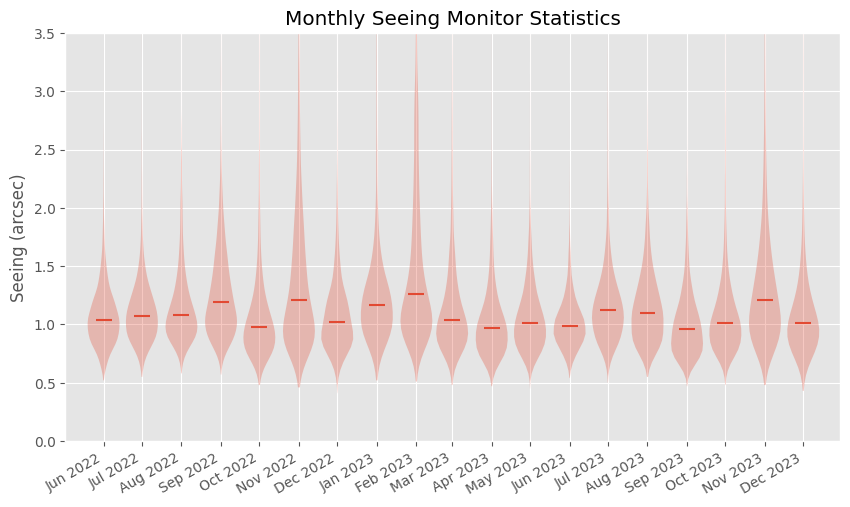

In [16]:
months = sorted(list(set(cyclop.index.strftime('%Y-%m'))))
cyc_mdata = [np.array(cyclop.loc[month]['seeing']) for month in months]
cyc_clean_data = {}
for d, arr in zip(months, cyc_mdata):
    if len(arr) > 0:
        cyc_clean_data[d] = arr
date_labels = [datetime.strptime(d, "%Y-%m").date() for d in cyc_clean_data.keys()]

with plt.style.context('ggplot', after_reset=True):
    fig, ax = plt.subplots(figsize=(10,6))
    plt.violinplot(cyc_clean_data.values(), mdates.date2num(date_labels), points=100, widths=25,
                showextrema=False, showmedians=True, bw_method='silverman')
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
    ax.set_ylim(0.0, 3.5)
    ax.set_xlim(
        datetime.strptime('2022-05-2', "%Y-%m-%d").date(),
        datetime.strptime('2023-12-30', "%Y-%m-%d").date()
    )
    fig.autofmt_xdate()
    plt.ylabel("Seeing (arcsec)")
    plt.savefig("wfs_cyclop_violin_monthly_both.pdf")
    plt.title("Monthly Seeing Monitor Statistics")
    plt.show()

In [17]:
f9 = fixed[fixed['wfs'] == 'newf9']
bino = fixed[fixed['wfs'] == 'binospec']
hecto = fixed[fixed['wfs'] == 'f5']
mmirs = fixed[fixed['wfs'] == 'mmirs']

In [18]:
f9_dates = sorted(list(set(f9.index.strftime('%Y-%m-%d'))))
bino_dates = sorted(list(set(bino.index.strftime('%Y-%m-%d'))))
hecto_dates = sorted(list(set(hecto.index.strftime('%Y-%m-%d'))))
mmirs_dates = sorted(list(set(mmirs.index.strftime('%Y-%m-%d'))))
#bino_dates, hecto_dates, f9_dates, mmirs_dates
f9_dates

['2022-06-08',
 '2022-11-17',
 '2022-11-19',
 '2022-11-20',
 '2022-11-21',
 '2022-11-22',
 '2023-04-20',
 '2023-04-22',
 '2023-04-23',
 '2023-04-24',
 '2023-04-25',
 '2023-04-26',
 '2023-10-04',
 '2023-10-05',
 '2023-10-06',
 '2023-10-07',
 '2023-10-08',
 '2023-10-09',
 '2023-10-10',
 '2023-12-05',
 '2023-12-06',
 '2023-12-07',
 '2023-12-08',
 '2023-12-09',
 '2023-12-10',
 '2023-12-11']

In [19]:
cyc_f9 = np.hstack([np.array(cyclop.loc[date]['seeing']) for date in f9_dates])
cyc_bino = np.hstack([np.array(cyclop.loc[date]['seeing']) for date in bino_dates])
cyc_hecto = np.hstack([np.array(cyclop.loc[date]['seeing']) for date in hecto_dates])
cyc_mmirs = np.hstack([np.array(cyclop.loc[date]['seeing']) for date in mmirs_dates])

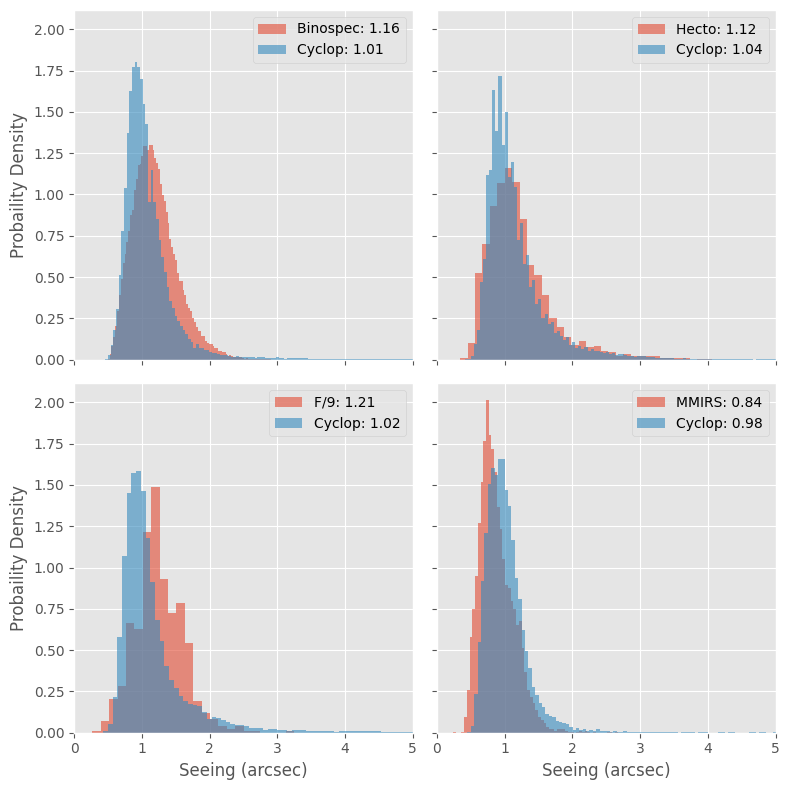

In [20]:
with plt.style.context('ggplot', after_reset=True):
    fig, ax = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
    ax = ax.flat
    fig.subplots_adjust(hspace=0)

    hist(bino['seeing'], bins='scott', ax=ax[0], histtype='stepfilled', alpha=0.6, density=True)
    hist(cyc_bino, bins='scott', ax=ax[0], histtype='stepfilled', alpha=0.6, density=True)
    ax[0].legend([f"Binospec: {np.median(bino['seeing']):.2f}", f"Cyclop: {np.median(cyc_bino):.2f}"])
    ax[0].set_ylabel("Probaility Density")
    ax[0].set_xlim(0, 5)

    hist(hecto['seeing'], bins='scott', ax=ax[1], histtype='stepfilled', alpha=0.6, density=True)
    hist(cyc_hecto, bins='scott', ax=ax[1], histtype='stepfilled', alpha=0.6, density=True)
    ax[1].legend([f"Hecto: {np.median(hecto['seeing']):.2f}", f"Cyclop: {np.median(cyc_hecto):.2f}"])
    ax[1].set_xlim(0, 5)

    hist(f9['seeing'], bins='scott', ax=ax[2], histtype='stepfilled', alpha=0.6, density=True)
    hist(cyc_f9, bins='scott', ax=ax[2], histtype='stepfilled', alpha=0.6, density=True)
    ax[2].legend([f"F/9: {np.median(f9['seeing']):.2f}", f"Cyclop: {np.median(cyc_f9):.2f}"])
    ax[2].set_xlim(0, 5)
    ax[2].set_xlabel("Seeing (arcsec)")
    ax[2].set_ylabel("Probaility Density")

    hist(mmirs['seeing'], bins='scott', ax=ax[3], histtype='stepfilled', alpha=0.6, density=True)
    hist(cyc_mmirs, bins='scott', ax=ax[3], histtype='stepfilled', alpha=0.6, density=True)
    ax[3].legend([f"MMIRS: {np.median(mmirs['seeing']):.2f}", f"Cyclop: {np.median(cyc_mmirs):.2f}"])
    ax[3].set_xlim(0, 5)
    ax[3].set_xlabel("Seeing (arcsec)")

    plt.tight_layout()
    plt.savefig("wfs_cyclop_vs_inst.pdf")
    plt.show()